# Project Description
Link: https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#About

BigMart has collected 2013 sales data for 1559 products across 10 stores located in different cities. Some attributes of both the store as well as the products have been provided. Our aim is to build a predictive model and find put the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of store and product playing vital role in sales.

# Important Steps

1. Hypothesis Generation
2. Data Exploration
3. Model Building

## 1. Hypothesis Generation

Without looking at the data, we will create our hypothesis listing all the possible factors affecting the sales of a product. There will be two types of hypthesis: store and product hypothesis.

### Store Hypothesis:
1. City - Densely populated or more advanced cities would have higher sales.
2. Size - Large size of store implies higher sales as cutomers prefer to buy everything at one place.
3. Location - The store located in the more central part of thr city where there is a good traffic are expected to have higher sales.
4. Opening Hours- 
5. Discounts
6. Number of cash counters - Do people have to wait for billing?
7. Level of automation - 

### Product Hypothesis:
1. Type of Product - commodity or unique.
2. Visibility - How much visible area does the product 
3. Packaging

## 2. Data Exploration
 Steps of data exploration:
 1. Variable Identification
 1. Univariate analysis
 2. Bivariate analysis
 3. Missing Value treatment
 5. Outlier Detection
 6. Variable Transformation (Feature Normalization)
 7. Variable Creation (Feature engineering)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk

In [3]:
train = pd.read_csv('../input/Train_UWu5bXk.txt', sep = ',')

In [4]:
test = pd.read_csv('../input/Test_u94Q5KV.txt', sep = ',')

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
for col in train:
    print(col, type(train[col][0]))

Item_Identifier <class 'str'>
Item_Weight <class 'numpy.float64'>
Item_Fat_Content <class 'str'>
Item_Visibility <class 'numpy.float64'>
Item_Type <class 'str'>
Item_MRP <class 'numpy.float64'>
Outlet_Identifier <class 'str'>
Outlet_Establishment_Year <class 'numpy.int64'>
Outlet_Size <class 'str'>
Outlet_Location_Type <class 'str'>
Outlet_Type <class 'str'>
Item_Outlet_Sales <class 'numpy.float64'>


## Classification of Variables:
We will classify the variables on two basis. The first basis of classification is whether they are string or numbers. This result has been presented above. The second classification is whether they are continuous or discrete. If they are continuous we will look at its mean, median, mode and visualize them by plotting histograms. If they are categorical, we will see the unique number of entries and then will plot the countplots.


In [10]:
for col in train:
    print(col , train[col].nunique())

Item_Identifier 1559
Item_Weight 415
Item_Fat_Content 5
Item_Visibility 7880
Item_Type 16
Item_MRP 5938
Outlet_Identifier 10
Outlet_Establishment_Year 9
Outlet_Size 3
Outlet_Location_Type 3
Outlet_Type 4
Item_Outlet_Sales 3493


In [11]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

We have to merge low fat, LF with Low Fat and reg with 'Regular'.

In [12]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')

In [13]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['reg'], 'Regular')

In [14]:
train.Item_Fat_Content.nunique()

2

In [15]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['reg'], 'Regular')

In [16]:
for col in train[['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Type', 'Outlet_Location_Type' ]]:
    print(train[col].unique())

['Low Fat' 'Regular']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Medium' nan 'High' 'Small']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
['Tier 1' 'Tier 3' 'Tier 2']


# Variable Identification result:
1. Categorical : 'Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Type', 'Outlet_Location_Type', Item_Identifier,'Outlet_Identifier', 'Outlet_Establishment_Year'
2. Continuous : 'Item_Weight', 'Item_Visibility', 'Item_MRP', 

In [17]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## 2. Univariate Analysis

In [18]:
train['Item_Weight2'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

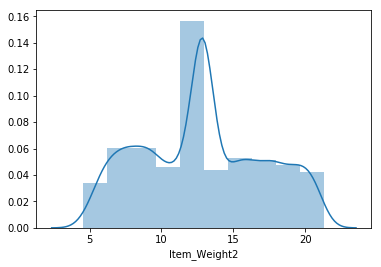

In [19]:
sns.distplot(train.Item_Weight2, bins = 10)

In [20]:
train['Item_Weight'] = train['Item_Weight2']

In [21]:
train =  train.drop('Item_Weight2', axis = 1)

In [22]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

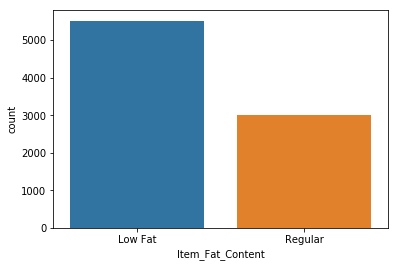

In [23]:
sns.countplot(train.Item_Fat_Content)

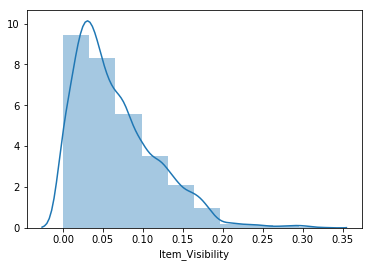

In [24]:
sns.distplot(train.Item_Visibility, bins = 10)

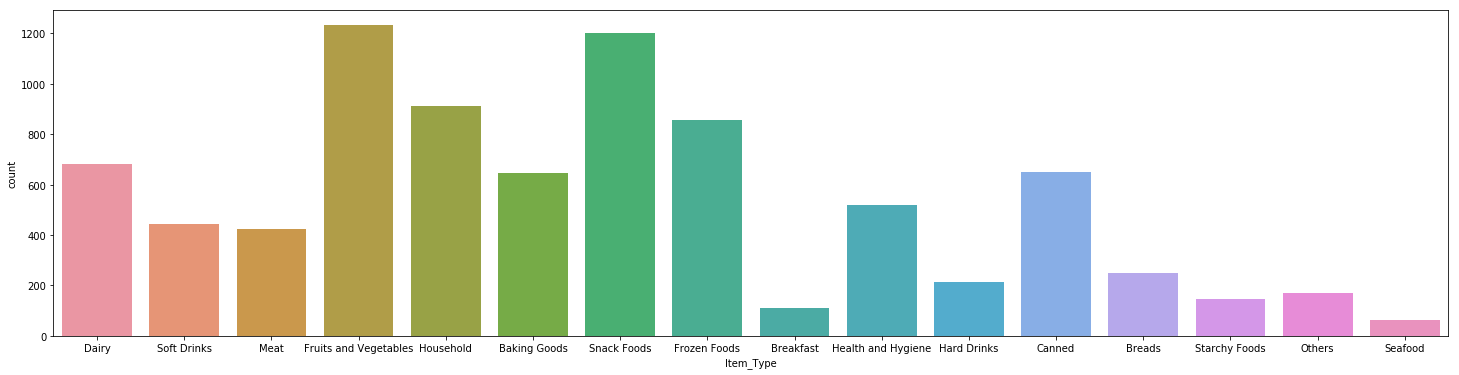

In [25]:
plt.figure(figsize= [25,6])
sns.countplot(train.Item_Type, orient =30)

In [26]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

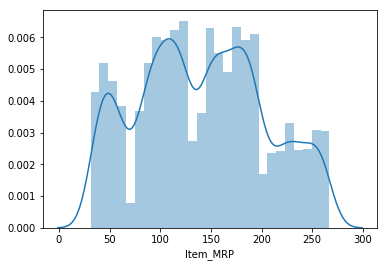

In [27]:
sns.distplot(train.Item_MRP)

# 3. Bivariate Analysis
1. continuous continuous
2. continuous categorical
3. categorical categorical

In [28]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Hypothesis : Light wright items should have higher visibility

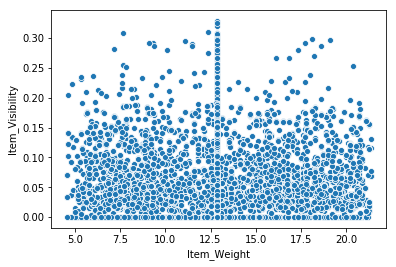

In [29]:
sns.scatterplot(x = train.Item_Weight, y = train.Item_Visibility)

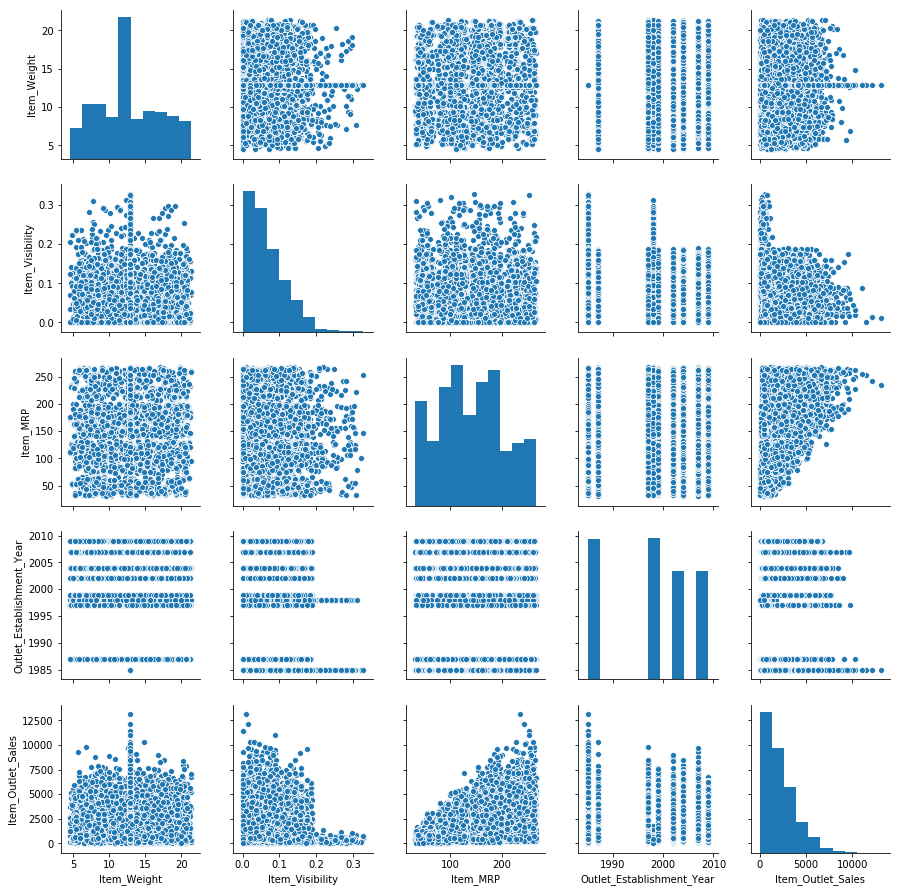

In [30]:
sns.pairplot(train)

### 2. Categorical and continuous


In [31]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

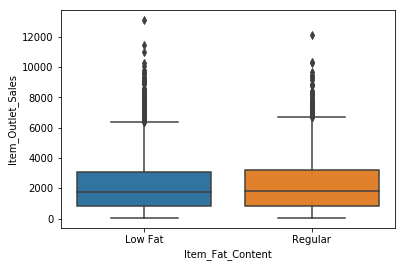

In [32]:
sns.boxplot(x = train.Item_Fat_Content, y = train.Item_Outlet_Sales)

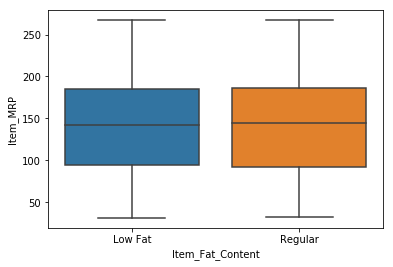

In [33]:
sns.boxplot(x = train.Item_Fat_Content, y = train.Item_MRP)

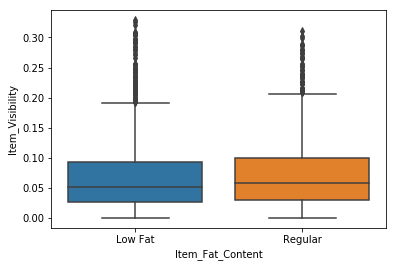

In [34]:
sns.boxplot(x = train.Item_Fat_Content, y = train.Item_Visibility)

In [35]:
def boxcompare(categorical, continuous):
    plt.figure(figsize=[20,6])
    sns.boxplot(x = categorical, y = continuous, data = train)
    

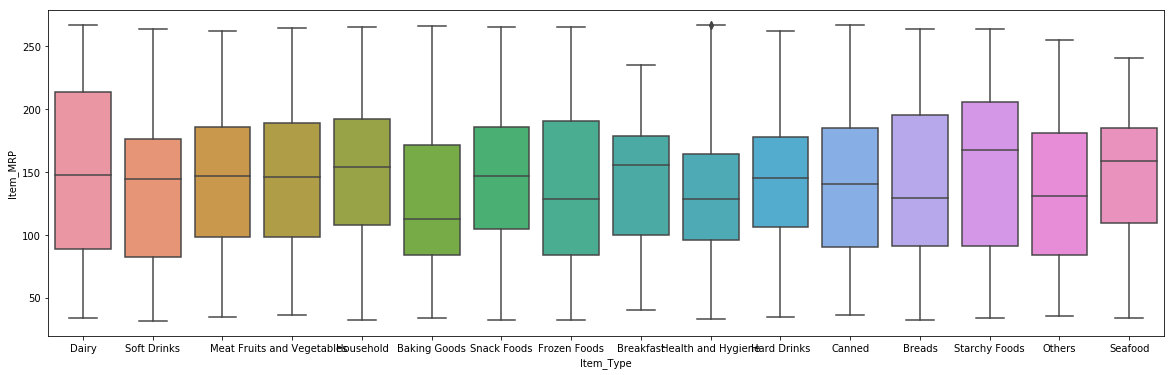

In [36]:
boxcompare('Item_Type', 'Item_MRP')

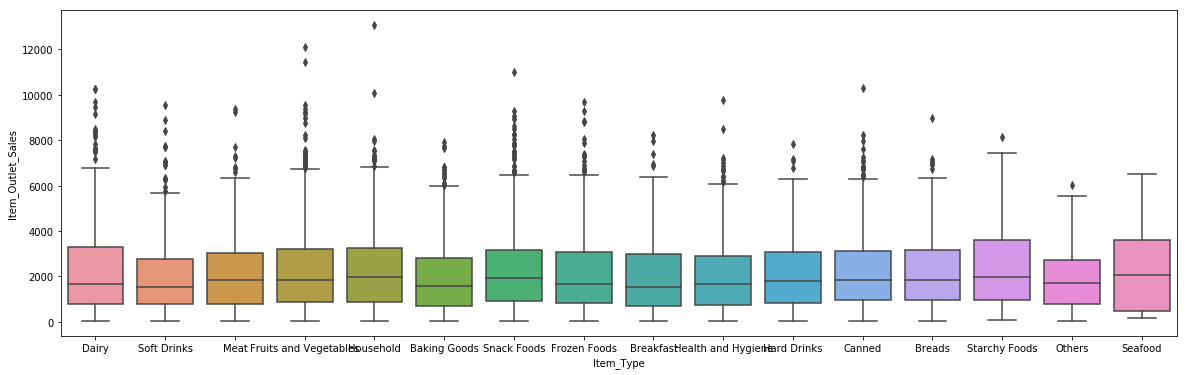

In [37]:
boxcompare('Item_Type', 'Item_Outlet_Sales')

We should combine both the train and test sets together before implementing feature engineering. This prevents us from doing the same work twice. In the data exploration step, we have already covered variable identification, univariate analysis, and bivariate analysis. Now we will move on to the remaining steps i.e., Missing Values Imputation, Outliers Handling, Feature Engineering and Feature Normalization.

In [38]:
train['Source'] = 'train'
test['Source'] = 'test'

In [39]:
data = pd.concat([train, test], ignore_index= True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [40]:
train.shape, test.shape, data.shape

((8523, 13), (5681, 12), (14204, 13))

In [41]:
data.apply(lambda x : sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                   976
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
Source                          0
dtype: int64

In [42]:
data.apply(lambda x : x.nunique())

Item_Fat_Content                 2
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3493
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      3
Outlet_Type                      4
Source                           2
dtype: int64

In [43]:
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x] == 'object']

In [44]:
categorical_columns2 = [x for x in data.columns if data.dtypes[x] == 'object']

In [45]:
categorical_columns2

['Item_Fat_Content',
 'Item_Identifier',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type',
 'Source']

In [46]:
for col in ('Item_Identifier', 'Outlet_Identifier', 'Source'):
     categorical_columns2.remove(col)


In [47]:
categorical_columns = categorical_columns2

In [48]:
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type']

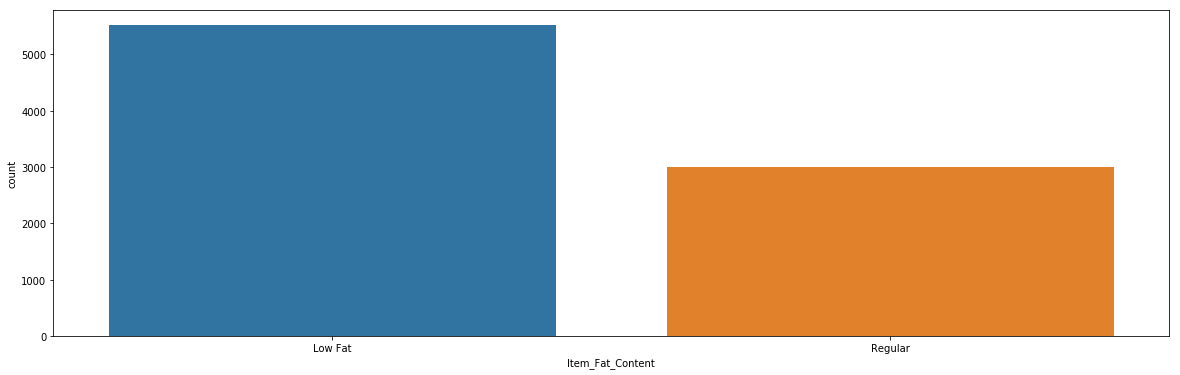

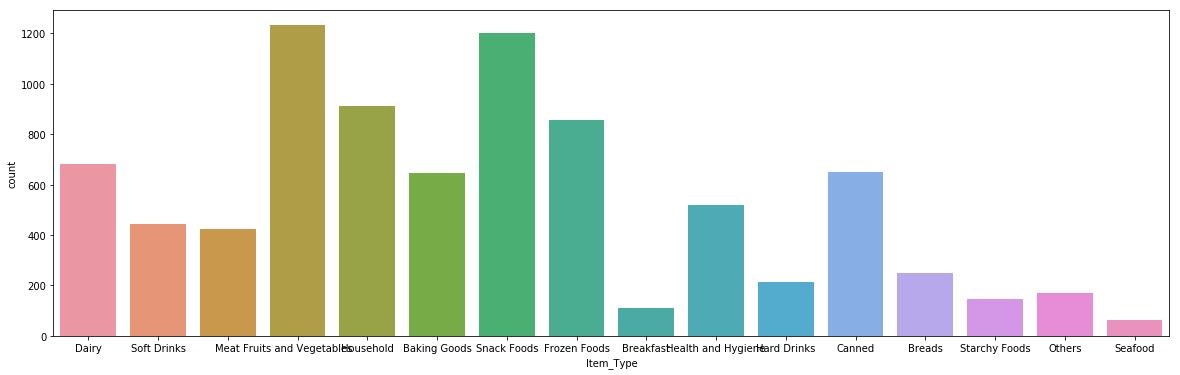

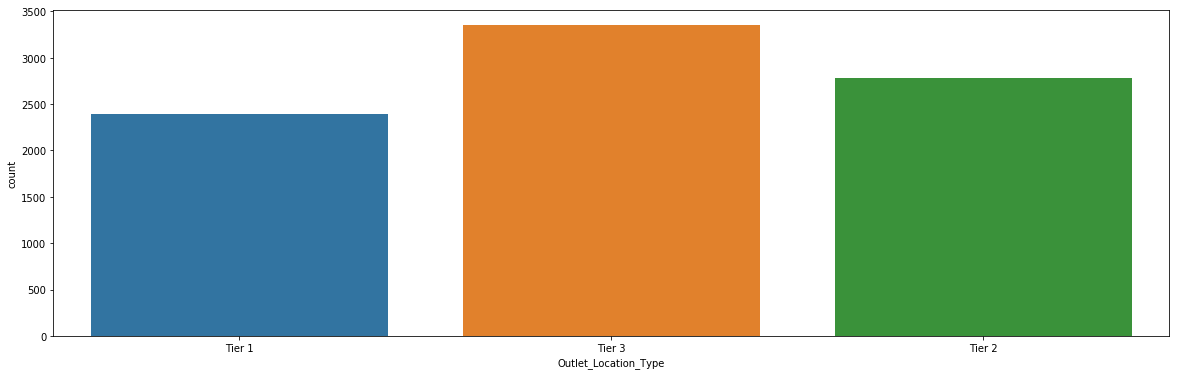

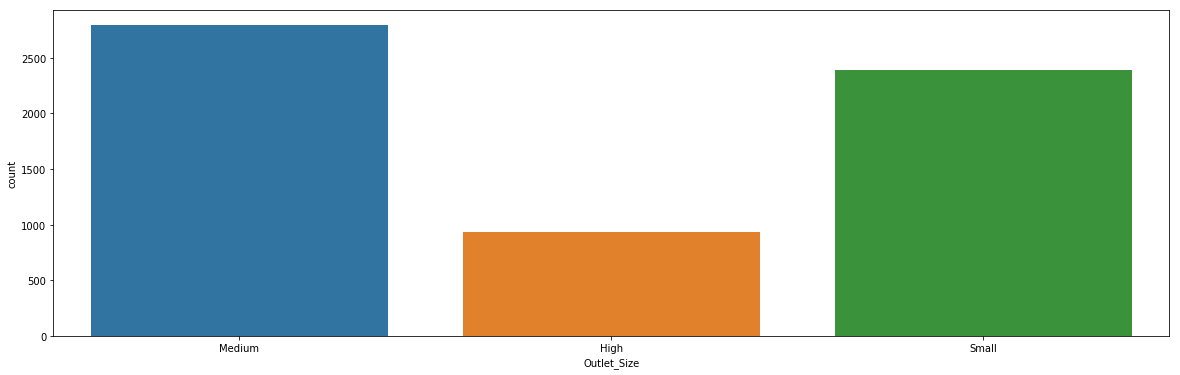

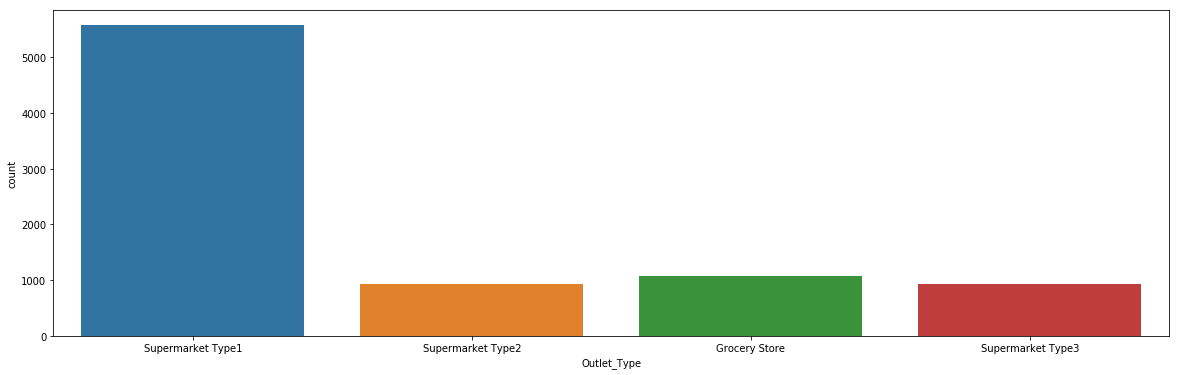

In [49]:
for col in categorical_columns:

    plt.figure(figsize = [20,6])
    sns.countplot(x = train[col] )

# Conclusions:
1. There are more low fat products
2. Fruits and Vegetables are the best sellers
3. The maximum number of outlets are present in Tier 2
4. Most of the outlets are of medium size.
5. The highest number of supermarkets are of Type 1.

# 4. Missing Value Treatment

In [50]:
# Finding Missing Values

data.apply(lambda x : sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                   976
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
Source                          0
dtype: int64

1. Item_Outlet_Sales is the target variable. All the missing values correspond to the test file.
2. Item_Weight has 976 and Outlet_Size has 4016 missing values.
3. Since, Outlet_Size has a lot of missing values, we need to decide whether we can drop this variable entirely.

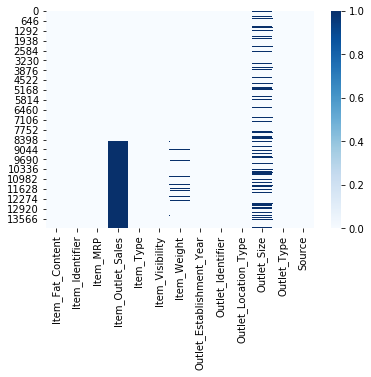

In [51]:
# Visualizing the missing values:

sns.heatmap(pd.isnull(data),cmap = 'Blues')

In [52]:
# Imputing the Missing Values: Item Weight is a numerical variable. So we will impute the NaNa with the mean value.
data['Item_Weight'][data['Item_Weight'].isnull()] = data['Item_Weight'].mean(skipna = True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
data['Outlet_Size'][data['Outlet_Size'].isnull()] = data['Outlet_Size'].mode()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
sum(data['Outlet_Size'].isnull())

4016

In [55]:
data['Outlet_Size'][data['Outlet_Size'].isnull()]

3        NaN
8        NaN
9        NaN
25       NaN
28       NaN
        ... 
14191    NaN
14193    NaN
14201    NaN
14202    NaN
14203    NaN
Name: Outlet_Size, Length: 4016, dtype: object

In [56]:
data['Outlet_Size'].mode(dropna = True)

0    Medium
dtype: object

In [57]:
data.Outlet_Size[data.Outlet_Size.isnull()] = data.Outlet_Size.mode()[0]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


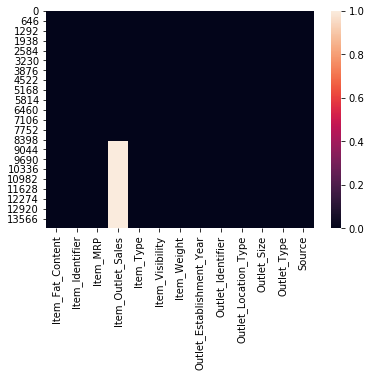

In [58]:
sns.heatmap(data.isnull())

### We have succesfully imputed all the missing values.

# 5. Outlier Detection

# 6. Feature Engineering
## I. Variable Creation

In [59]:
data.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Source'],
      dtype='object')

In [60]:
for col in categorical_columns2:
    print(data[col].unique())

['Low Fat' 'Regular']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Tier 1' 'Tier 3' 'Tier 2']
['Medium' 'High' 'Small']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


# Ideas for feature engineering:
1. Further divide the Item_Type in healthy, unheathy and neutral food items.
2. Create a variable based on the Item_Type which has three categories : food, drinks, non-consumables
3. Modify Item_Visibility
4. Modify categories of Item_Fat_Content
5. Create a variable indicating years of operation of each store

In [61]:
for i in range(len(data['Item_Type'])):
    if data.Item_Type in 
    data['Item_Type_2'] = data['Item_Type']
    

SyntaxError: invalid syntax (<ipython-input-61-77dad79d7b10>, line 2)

In [62]:
for col in categorical_columns2:
    print( col, data[col].unique())
    print('\n')

Item_Fat_Content ['Low Fat' 'Regular']


Item_Type ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Size ['Medium' 'High' 'Small']


Outlet_Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




# 1. Item type modified to healthy, non-healthy and neutral

In [63]:
Item_Type_Modified = ['Dairy', 'Healthy', 'Soft Drinks', 'Unhealthy', 'Meat', 'Healthy', 'Fruits and Vegetables', 'Healthy', 'Household',
'Neutral', 'Baking Goods', 'Unhealthy', 'Snack Foods','Unhealthy', 'Frozen Foods', 'Unhealthy',
'Breakfast', 'Healthy', 'Health and Hygiene', 'Neutral',  'Hard Drinks', 'Unhealthy', 'Canned', 'Unhealthy',
'Breads', 'Unhealthy', 'Starchy Foods', 'Unhealthy', 'Others', 'Neutral', 'Seafood', 'Healthy']

In [64]:
data['Item_Type_2'] = data.Item_Type.copy()

In [65]:
data.Item_Type_2 = data.Item_Type_2.replace({'Dairy' : 'Healthy', 'Soft Drinks' : 'Unhealthy', 'Meat' : 'Healthy', 'Fruits and Vegetables' : 'Healthy', 'Household' : 'Neutral', 'Baking Goods' : 'Unhealthy', 'Snack Foods' : 'Unhealthy', 'Frozen Foods' : 'Unhealthy', 'Breakfast' : 'Healthy', 'Health and Hygiene' : 'Neutral', 'Hard Drinks' : 'Unhealthy', 'Canned' : 'Unhealthy', 'Breads' : 'Unhealthy', 'Starchy Foods' : 'Unhealthy', 'Others' : 'Neutral', 'Seafood' : 'Healthy'})

In [66]:
data.Item_Type_2.unique()

array(['Healthy', 'Unhealthy', 'Neutral'], dtype=object)

# 2. Food, Drinks and Non-Consummables

In [67]:
data['Item_Type_3'] = data.Item_Type.copy()

In [68]:
data.Item_Type_3 = data.Item_Type_3.replace({'Dairy' : 'Food', 'Soft Drinks' : 'Drinks', 'Meat' : 'Food', 'Fruits and Vegetables' : 'Food', 'Household' : 'Non-Consummables', 'Baking Goods' : 'Food', 'Snack Foods' : 'Food', 'Frozen Foods' : 'Food', 'Breakfast' : 'Food', 'Health and Hygiene' : 'Non-Consummables', 'Hard Drinks' : 'Drinks', 'Canned' : 'Food', 'Breads' : 'Food', 'Starchy Foods' : 'Food', 'Others' : 'Non-Consummables', 'Seafood' : 'Food'})

In [69]:
data["Item_Type_3"].unique()

array(['Food', 'Drinks', 'Non-Consummables'], dtype=object)

# 3. Modify Item_Visibility

In [70]:
data.Item_Visibility.head()

0    0.016047
1    0.019278
2    0.016760
3    0.000000
4    0.000000
Name: Item_Visibility, dtype: float64

In [71]:
data.Item_Visibility[data.Item_Visibility == 0]

3        0.0
4        0.0
5        0.0
10       0.0
32       0.0
        ... 
14166    0.0
14171    0.0
14177    0.0
14184    0.0
14202    0.0
Name: Item_Visibility, Length: 879, dtype: float64

In [72]:
data['Item_Visibility'] = data.Item_Visibility.replace(to_replace = 0, value = np.nan)

In [73]:
data['Item_Visibility'] = data['Item_Visibility'].fillna(data.Item_Visibility.mean(skipna=  True))

In [74]:
pd.DataFrame(data.Item_Visibility).describe()

,Item_Visibility
count,14204.000000
mean,0.070303
std,0.048590
min,0.003575
25%,0.033143
50%,0.062347
75%,0.094037
max,0.328391


Item having 0 visibility have been replaced by the average of other visibilities.

# 4. Modifying Item_Fat_Content
We can see that corresponding to Non-Consummables we have some Item_Fat_Content values which is illogical. We will replace these entries with 'Non-Consummables'.

In [75]:
data[data['Item_Type_3'] == 'Non-Consummables'].head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source,Item_Type_2,Item_Type_3
4,Low Fat,NCD19,53.8614,994.7052,Household,0.070303,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Neutral,Non-Consummables
16,Low Fat,NCB42,115.3492,1621.8888,Health and Hygiene,0.008596,11.80,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Neutral,Non-Consummables
22,Low Fat,NCB30,196.5084,1587.2672,Household,0.025698,14.60,2004,OUT035,Tier 2,Small,Supermarket Type1,train,Neutral,Non-Consummables
25,Low Fat,NCD06,45.9060,838.9080,Household,0.099887,13.00,2007,OUT017,Tier 2,Medium,Supermarket Type1,train,Neutral,Non-Consummables
31,Low Fat,NCS17,96.4436,2741.7644,Health and Hygiene,0.080829,18.60,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Neutral,Non-Consummables


In [76]:
data.loc[data['Item_Type_3'] == 'Non-Consummables','Item_Fat_Content' ] = 'Non-Consummables'

In [77]:
data[data['Item_Type_3'] == 'Non-Consummables'].head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source,Item_Type_2,Item_Type_3
4,Non-Consummables,NCD19,53.8614,994.7052,Household,0.070303,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Neutral,Non-Consummables
16,Non-Consummables,NCB42,115.3492,1621.8888,Health and Hygiene,0.008596,11.80,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Neutral,Non-Consummables
22,Non-Consummables,NCB30,196.5084,1587.2672,Household,0.025698,14.60,2004,OUT035,Tier 2,Small,Supermarket Type1,train,Neutral,Non-Consummables
25,Non-Consummables,NCD06,45.9060,838.9080,Household,0.099887,13.00,2007,OUT017,Tier 2,Medium,Supermarket Type1,train,Neutral,Non-Consummables
31,Non-Consummables,NCS17,96.4436,2741.7644,Health and Hygiene,0.080829,18.60,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Neutral,Non-Consummables


# 5. Year of Operation

In [78]:
data['Years_Of_Operation'] = 2019 - data.Outlet_Establishment_Year

In [79]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Source,Item_Type_2,Item_Type_3,Years_Of_Operation
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Healthy,Food,20
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Unhealthy,Drinks,10
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Healthy,Food,20
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.070303,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train,Healthy,Food,21
4,Non-Consummables,NCD19,53.8614,994.7052,Household,0.070303,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Neutral,Non-Consummables,32



## II. Variable Transformation
Variable transformation mainly involves normalization and encoding. 
We wish to see the effects of feature normalization on the accuracy of the model. For this reason, we are keeping the feature normalization for the later part of the exeercise. Since sklearn only accepts numerical values, we will use one hot encoding to convert string categorical variable into numerical categorical variable.

In [98]:
from sklearn.preprocessing import OneHotEncoder

In [100]:
categorical_columns = [x for x in data.columns if data.dtypes[x] == 'object']

In [101]:
categorical_columns

['Item_Fat_Content',
 'Item_Identifier',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type',
 'Source',
 'Item_Type_2',
 'Item_Type_3']

In [102]:
data_copy = data.copy()

In [103]:
encoder = OneHotEncoder(categorical_columns)

In [107]:
data_copy = OneHotEncoder.fit_transform(data_copy, categorical_columns).toarray()

AttributeError: 'DataFrame' object has no attribute '_validate_keywords'

In [108]:
data_encoded = data.copy()

In [ ]:
data